In [1]:
import os

import matplotlib.colors as clr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.ndimage import convolve, gaussian_filter

### Calculate Charge distribution

In [2]:
aa_seq_FUS = "MASNDYTQQATQSYGAYPTQPGQGYSQQSSQPYGQQSYSGYSQSTDTSGYGQSSYSSYGQSQNTGYGTQSTPQGYGSTGGYGSSQSSQSSYGQQSSYPGYGQQPAPSSTSGSYGSSSQSSSYGQPQSGSYSQQPSYGGQQQSYGQQQSYNPPQGYGQQNQYNSSSGGGGGGGGGGNYGQDQSSMSSGGGSGGGYGNQDQSGGGGSGGYGQQDRGGRGRGGSGGGGGGGGGGYNRSSGGYEPRGRGGGRGGRGGMGGSDRGGFNKFGGPRDQGSRHDSEQDNSDNNTIFVQGLGENVTIESVADYFKQIGIIKTNKKTGQPMINLYTDRETGKLKGEATVSFDDPPSAKAAIDWFDGKEFSGNPIKVSFATRRADFNRGGGNGRGGRGRGGPMGRGGYGGGGSGGGGRGGFPSGGGGGGGQQRAGDWKCPNPTCENMNFSWRNECNQCKAPKPDGPGGGPGGSHMGGNYGDDRRGGRGGYDRGGYRGRGGDRGGFRGGRGGGDRGGFGPGKMDSRGEHRQDRRERPY"

In [3]:
dict_map_charge = {
    "A": 0,
    "C": 0,
    "D": -1,
    "E": -1,
    "F": 0,
    "G": 0,
    "H": 0,  # pKa=6.0, and thus not positive under pH 7
    "I": 0,
    "K": 1,
    "L": 0,
    "M": 0,
    "N": 0,
    "P": 0,
    "Q": 0,
    "R": 1,
    "S": 0,
    "T": 0,
    "V": 0,
    "W": 0,
    "Y": 0,
}  # dictionary mapping amino acids to net charge, assuming pH=7
dict_map_aromatic = {
    "A": 0,
    "C": 0,
    "D": 0,
    "E": 0,
    "F": 1,
    "G": 0,
    "H": 1,
    "I": 0,
    "K": 0,
    "L": 0,
    "M": 0,
    "N": 0,
    "P": 0,
    "Q": 0,
    "R": 0,
    "S": 0,
    "T": 0,
    "V": 0,
    "W": 1,
    "Y": 1,
}  # dictionary mapping amino acids to aromatic

In [4]:
# sigma = 1
# truncate = 5
# window_size = 1 + truncate * sigma  # =window size of hydropathy plot
window_size = 21
kernel = np.repeat(1/window_size, window_size)
lst_aa = pd.Series(list(aa_seq_FUS))
charge = lst_aa.map(dict_map_charge).to_numpy(float)
# charge_smooth_norm = gaussian_filter(charge, sigma=sigma, truncate=truncate)
charge_smooth_norm = convolve(charge, kernel)

aromatic = lst_aa.map(dict_map_aromatic).to_numpy(float)
# aromatic_smooth_norm = gaussian_filter(aromatic, sigma=sigma, truncate=truncate)
aromatic_smooth_norm = convolve(aromatic, kernel)

### Import hydrophobicity and IDR profile

In [5]:
folder = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig1_system design/FUS_profile_plot"
os.chdir(folder)
df_hydropathy = pd.read_csv(
    "hydropathy_consensus_params_Eisenberg_etal_windowsize21.csv"
)
hydropathy_raw = df_hydropathy["Result"].to_numpy(float)
# hydropathy = gaussian_filter(hydropathy_raw, sigma=sigma, truncate=truncate)
# hydropathy = convolve(hydropathy_raw, kernel)
hydropathy = hydropathy_raw

df_idr = pd.read_csv("iupred3_and_experiment_DisProt_no_smoothing.csv")
iupred_raw = df_idr["IUPRED SCORE"].to_numpy(float)
# iupred_score = gaussian_filter(iupred_raw, sigma=sigma, truncate=truncate)
# iupred_score = convolve(iupred_raw, kernel)
iupred_score = iupred_raw

### Plot

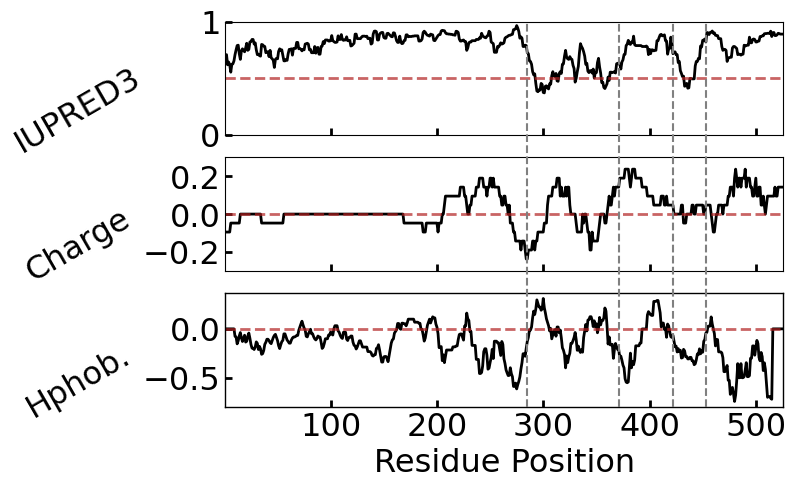

In [7]:
fontsize = 23
relative_ylabel = 0.25
lw = 2
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7.2, 5), sharex=True)

# row 1: IDR
ax1.plot(iupred_score, c="k", lw=lw)
ax1.set_ylabel("IUPRED3", c="k", fontsize=fontsize)
ax1.set_ylim(0, 1)
ax1.axhline(0.5, c="firebrick", ls="--", lw=lw, alpha=0.7)
# row 2: charge
ax2.plot(charge_smooth_norm, c="k", lw=lw)
ax2.set_ylabel("Charge", color="k", fontsize=fontsize)
ax2.set_ylim(-0.3, 0.3)
ax2.set_yticks([-0.2, 0, 0.2])
ax2.axhline(0, c="firebrick", ls="--", lw=lw, alpha=0.7)
# row 3: hydrophobic
ax3.plot(hydropathy, c="k", lw=lw)
ax3.set_ylabel("Hphob.", color="k", fontsize=fontsize)
ax3.axhline(0, c="firebrick", ls="--", lw=lw, alpha=0.7)
# row 4: aromatic
# for x in np.nonzero(aromatic)[0]:
#     ax4.axvline(x, c="grey", lw=lw)
# ax4.set_yticks([])
# ax4.plot(aromatic_smooth_norm, c='k', lw=lw)
# ax4.set_ylabel("Aroma.", color="k", fontsize=fontsize)

# set up x and y ticks
plt.xlabel("Residue Position", fontsize=fontsize)
plt.gca().spines[:].set_linewidth(1)
plt.xlim(1, 526)
plt.xticks([100, 200, 300, 400, 500])
for ax in [ax1, ax2, ax3, ax4]:
    ax.tick_params(
        axis="both",
        which="major",
        labelsize=fontsize,
        direction="in",
        bottom=True,
        left=True,
        length=5,
        width=2,
    )

# Align y labels
relative_ylabel = 0.25
for ax in [ax1, ax2, ax3, ax4]:
    yl = ax.get_ylabel()
    ax.set_ylabel(yl, fontsize=fontsize, rotation=30)
    ax.yaxis.set_label_coords(-relative_ylabel, 0.1)

# Add vertical lines across subplots in figure coordinates
for vertical_line_x in [285, 371, 422, 453]:
    # Normalize to the axes coordinates then transform to figure coordinates
    line_x = ax1.transData.transform((vertical_line_x, 0))[0] / fig.bbox.width
    line = plt.Line2D(
        [line_x, line_x],
        [0.11, 0.88],
        transform=fig.transFigure,
        color="gray",
        linestyle="--",
        lw=1.5,
    )
    fig.lines.extend([line])

fname_png = "Fig1_FUS_profile.png"
plt.savefig(
    fname_png,
    format="png",
    bbox_inches="tight",
    dpi=600,
)